# Customer Segmentation using K Means clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
url = "https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/master/datasets/Wholesale%20customers%20data.csv"
df = pd.read_csv(url)
df.shape

(440, 8)

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## 3. Data Cleaning

In [4]:
#check for missing values
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
# check for duplicates
df.duplicated().sum()

0

In [6]:
# check for outliers
df.skew()

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

In [7]:
# capping the outliers
df.Fresh[df.Fresh>df.Fresh.quantile(0.95)] = df.Fresh.quantile(0.92)
df.Milk[df.Milk>df.Milk.quantile(0.94)] = df.Milk.quantile(0.90)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
df.skew()

Channel              0.760951
Region              -1.283627
Fresh                0.853094
Milk                 0.864039
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

In [9]:
df2 = df[['Fresh','Milk']]

## Preprocessing

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df3 = sc.fit_transform(df2)

## Apply K Means

In [12]:
from sklearn.cluster import KMeans
model = KMeans(random_state=5,n_clusters=3,tol=0.000001)

In [13]:
model.fit(df3)

KMeans(n_clusters=3, random_state=5, tol=1e-06)

In [20]:
model.cluster_centers_

array([[-0.46996611, -0.61059512],
       [ 1.42553102, -0.09276855],
       [-0.59232667,  1.33888125]])

In [14]:
cents = model.cluster_centers_
cents = sc.inverse_transform(cents)
pd.DataFrame(cents,columns=df2.columns)

,Fresh,Milk
0,6597.161290,2442.000000
1,24213.451379,4473.321552
2,5459.971963,10089.373832


In [15]:
# 0 cluster -  Moderate spenders on Fresh, lowest spenders on Milk
# 1 cluster - heavy spenders on Fresh, moderate spenders on Milk
# 2 cluster - lowest spenders on Fresh, heavy spenders on Milk

In [16]:
df2['cluster'] = model.labels_
df2.head(8)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Fresh,Milk,cluster
0,12669.0,9656.0,2
1,7057.0,9810.0,2
2,6353.0,8808.0,2
3,13265.0,1196.0,0
4,22615.0,5410.0,1
5,9413.0,8259.0,2
6,12126.0,3199.0,0
7,7579.0,4956.0,0


C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


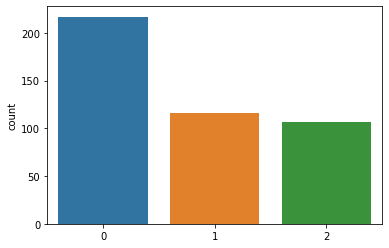

In [18]:
sns.countplot(model.labels_)
plt.show()

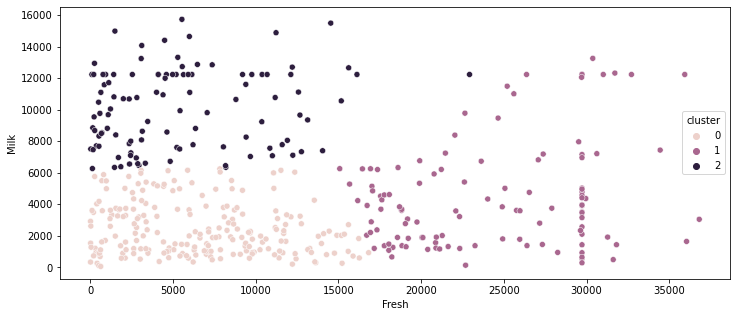

In [19]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Fresh',y='Milk',hue='cluster',data=df2)
plt.show()

## Elbow Method

In [21]:
k = []
inertia = []

for i in range(1,10):
    model = KMeans(n_clusters=i,random_state=5)
    model.fit(df3)
    k.append(i)
    inertia.append(model.inertia_)

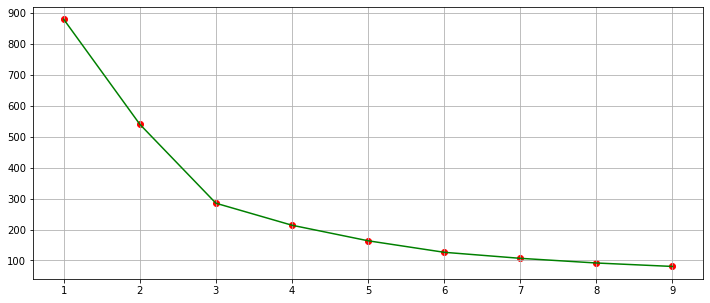

In [22]:
plt.figure(figsize=(12,5))
plt.plot(k,inertia,c='g')
plt.scatter(k,inertia,c='r')
plt.grid(True)
plt.show()